In [ ]:
# This cell can take some minutes to run
# You should only need to run this cell once and not everytime you open the script
# In case the plotting of the data below does not work because of the error "Error displaying widget: model not found"
# First, try only running "Run" << "Factory Reset"
# If this does not help, run this cell again and then "Run" << "Factory Reset"

# IMPORTANT: After running this cell, go to the top of the page and select "Run" << "Factory Reset"
!jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet
!pip install install nodejs

In [1]:
import matplotlib.pyplot as plt

# You may make changes to the Lilygo module but your algorithm must work with the original version
# If you want to propose changes to the module, create a pull-request on github
from Lilygo.Recording import Recording, data_integrity
from Lilygo.Dataset import Dataset

# For interactive graphs
%matplotlib widget

# Reading sensor data from JSON file

Create an instance of the <code>Recording</code> class that manages the data from a file

In [38]:
trace = Recording('./data/recorded/L1/4/lilygo_28_03_18_00_11.json', no_labels=True, mute=True)  # Second example file: data/example/short_walk.json

trace.DataIntegrityCheck()

# The data is stored inside a dictionary (access: trace.data["key"])
print("\r\nAvailable data traces:")
print(list(trace.data.keys()))

if not(trace.labels is None):
    print("\r\nLabels: ")
    print(trace.labels)

🟠 Warning: data trace phone_pressure missing
Finished Integrity Check!
🟠 Despite missing 1 non-essential sensors, this trace is suitable for submission as far as this automated test can judge.
🟠 However, the trace is missing the required labels for submission

Available data traces:
['my', 'phone_az', 'phone_rotx', 'phone_gravz', 'phone_roty', 'phone_gravy', 'phone_gy', 'phone_my', 'phone_laz', 'phone_light', 'phone_magroty', 'phone_gx', 'phone_mx', 'phone_ax', 'timestamp', 'altitude', 'phone_rotm', 'phone_magrotx', 'temperature', 'mz', 'latitude', 'phone_magrotz', 'phone_lax', 'gz', 'phone_orientationz', 'az', 'phone_lay', 'ax', 'speed', 'gy', 'phone_ay', 'longitude', 'mx', 'phone_mz', 'phone_orientationx', 'phone_orientationy', 'note', 'gx', 'bearing', 'packetNumber', 'ay', 'phone_gz', 'phone_gravx', 'phone_rotz']


## Working with timeseries
Every value in this dictionary holds a <code>Dataset</code> object to manage the data from one sensor

In [39]:
# X-axis of the LILYGO accelerometer
ax = trace.data['ax']

print(f"Name of sensor: '{ax.title}'")
print(f"Sample rate: {int(ax.samplerate)} Hz")
print(f"Recording length: {ax.total_time} seconds")
print(f"Timestamp of recording: {ax.raw_timestamps[0][1]}")
print("\nGetting a time series:")
print(" Time           x-Accel")
for x, t in list(zip(ax.timestamps, ax.values))[:20]:
    print(f"{x: .3f}s \t{t:.5f}g")

Name of sensor: 'ax'
Sample rate: 199 Hz
Recording length: 500.358 seconds
Timestamp of recording: 1680019213575

Getting a time series:
 Time           x-Accel
 0.000s 	-0.03516g
 0.005s 	-0.04590g
 0.010s 	-0.05933g
 0.015s 	-0.02173g
 0.020s 	-0.06079g
 0.025s 	-0.05737g
 0.030s 	-0.07739g
 0.035s 	-0.05200g
 0.040s 	-0.08179g
 0.045s 	-0.08203g
 0.050s 	-0.08179g
 0.055s 	-0.10620g
 0.060s 	-0.07129g
 0.065s 	-0.09180g
 0.070s 	-0.10034g
 0.075s 	-0.10449g
 0.080s 	-0.08936g
 0.085s 	-0.11353g
 0.090s 	-0.13062g
 0.095s 	-0.13110g


# Plotting

In [ ]:
# Display a simple plot
trace.plot(['ax'])

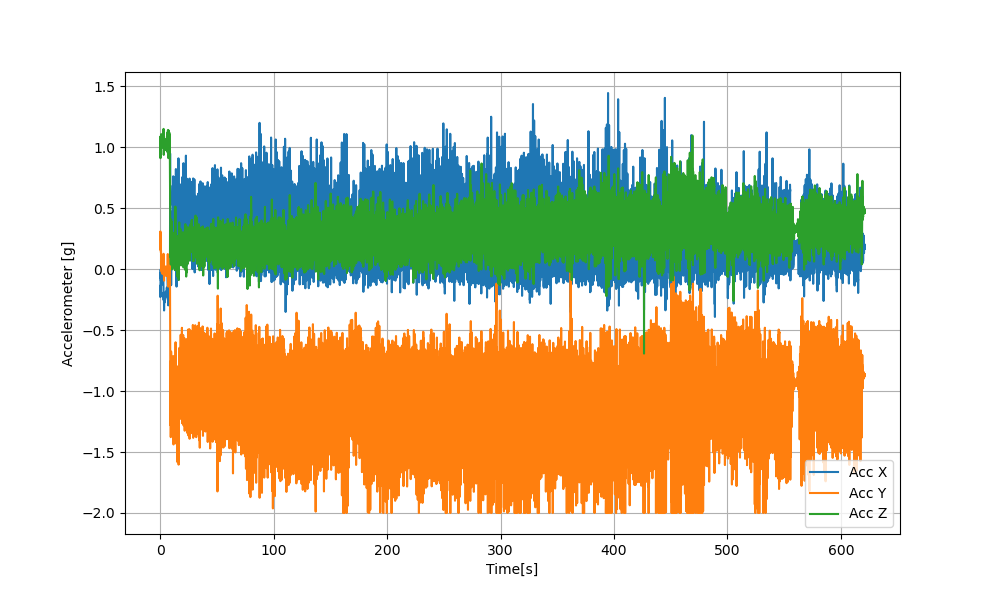

In [14]:
# Plot multiple axis at the same time
# It's also possible to give titles to the y-axis and plots
trace.plot(['ax', 'ay', 'az'], ylabels=['Accelerometer [g]'], labels=['Acc X', 'Acc Y', 'Acc Z'])

/Users/user/Documents/GitHub/Mobile_Health_Exercise/mobile-health-2023-step-count/Lilygo/Recording.py:285: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(nrows=len(keys),ncols=1,figsize=(10, 6), sharex=True, squeeze=False)


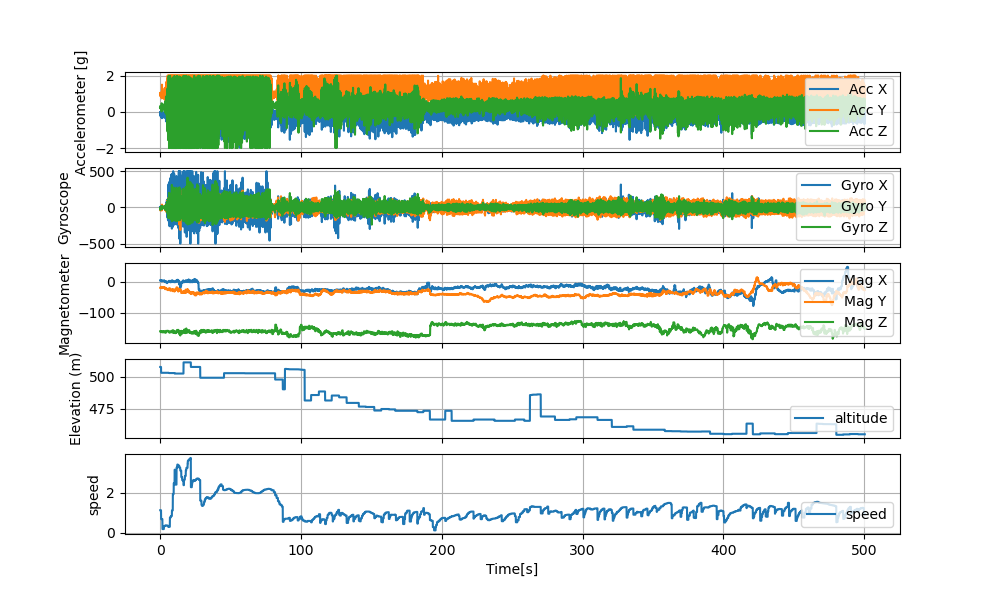

In [40]:
# Plot multiple sensors and multiple axis at the same time
trace.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz'], ['mx', 'my', 'mz'], ['altitude'], ['speed']], 
             ylabels=['Accelerometer [g]', 'Gyroscope', 'Magnetometer', 'Elevation (m)', 'speed'],
             labels=[['Acc X', 'Acc Y', 'Acc Z'], ['Gyro X', 'Gyro Y', 'Gyro Z'], ['Mag X', 'Mag Y', 'Mag Z'], ['altitude'], ['speed']])

# Display GPS data

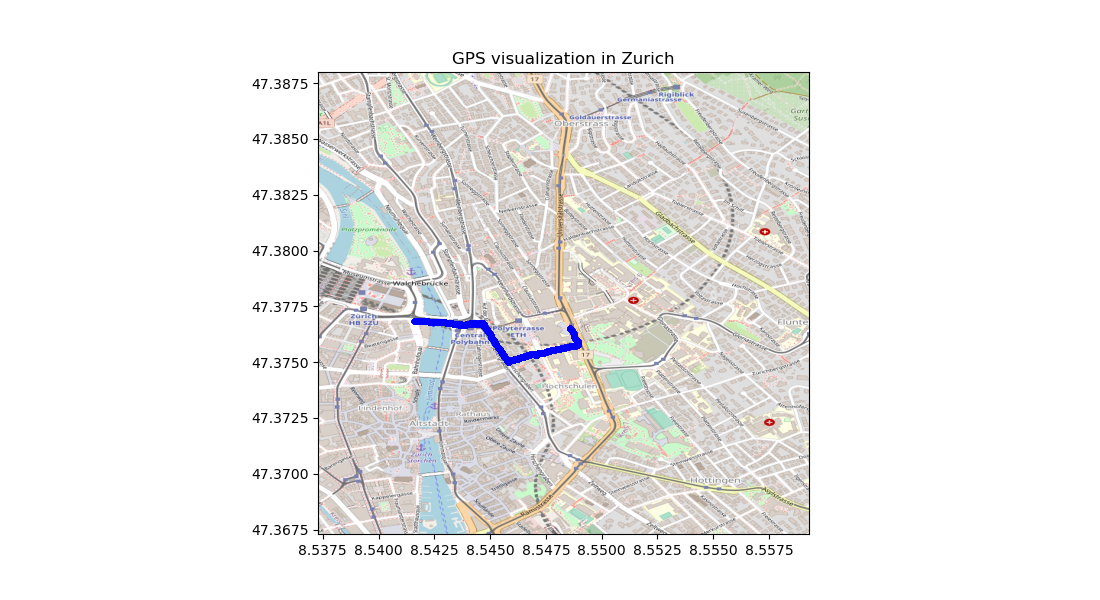

In [41]:
# Trace must contain gps data
assert('latitude' in trace.data and 'longitude' in trace.data)

plot_map_zurich = True

# Visualize the path of the trace
fig, ax = plt.subplots(figsize = (11,6))
ax.scatter(trace.data['longitude'].values, trace.data['latitude'].values, zorder=1, alpha= 0.9, c='b', s=10)
ax.set_title('Visualization of the path')

if plot_map_zurich:
    # Bounding coordinates for map
    BBox = (8.5373,8.5593,
            47.3673, 47.3880)
    # Load map of Zurich
    ruh_m = plt.imread('mapzurich.png')
    ax.set_title('GPS visualization in Zurich')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(ruh_m, zorder=0, extent = BBox)

# Generate computed traces

Small example that adds an accelerometer magnitude trace

<code>Dataset.fromLists(name, values, timestamps)</code> can be used to save a new or modified sensor into the Recording object.

<code>name</code>: used for plotting  
<code>values</code>: modified values  
<code>timestamps</code>: list of timestamps, one timestamp per value, usually directly taken from the original data

Note: This change is only executed locally and not saved to the json file. Everytime you reload your dataset, you have to re-execute this calculation


In [ ]:
from math import sqrt

# Trace must contain lilygo accelerometer data
assert('ax' in trace.data and 'ay' in trace.data and 'az' in trace.data)
# And those traces must be of the same length
assert(len(trace.data['ax'].values) == len(trace.data['ay'].values)  and len(trace.data['ax'].values) == len(trace.data['az'].values) )

magn = [sqrt(a**2+trace.data['ay'].values[i]**2+trace.data['az'].values[i]**2)for i, a in enumerate(trace.data['ax'].values)]

trace.data['amagn'] = Dataset.fromLists('Accelerometer magnitude', magn, trace.data['ax'].timestamps)

trace.plot([['ax', 'ay', 'az'], ['amagn']])

# FYI: How timestamps are handeled (you probably don't need this)

Every time the app receives a bluetooth package, up to 16 sensor values are stored at once together with the current timestamp. So not every sensor reading has a 100% perfectly defined timestamp.

Every <code>Dataset</code> has a list of <code>raw_timestamps</code> which are tuples of type <code>(packet number, timestamp)</code>

The timestamps are standard unix timestamps in milliseconds

For example the first two entries say "The 0th value came in at 1641564932653, the 16th value at 1641564932694"

In [ ]:
trace.data['ax'].raw_timestamps[-1][1]-trace.data['ax'].raw_timestamps[0][1]

The LILYGO uses a FIFO with a constant sample rate, so it should be a fair assumption, that the delay between two consecutive reaings always is the same.

By default the <code>Dataset.timestamps</code> list is linearly interpolated between the first and the last timestamps (<code>linspace(0, last_timestamp, num=len(values))</code>)

In [ ]:
# Compare "ideal" interpolated timestamps against actual received timestamps
trace.data['ideal_ts'] = Dataset('ideal_ts', 
                                   [trace.data['timestamp'].values[0],trace.data['timestamp'].values[-1]], 
                                   [(0,trace.data['timestamp'].values[0]), 
                                    (len(trace.data['timestamp'].values), trace.data['timestamp'].values[-1])])
trace.plot(['timestamp', 'ideal_ts'], labels=['Received timestamps', 'Calculated Timestamps'], ylabels=['ms'])